In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.4 MB/s eta 0:00:00


Review Class (0..100): 18.777777777777775


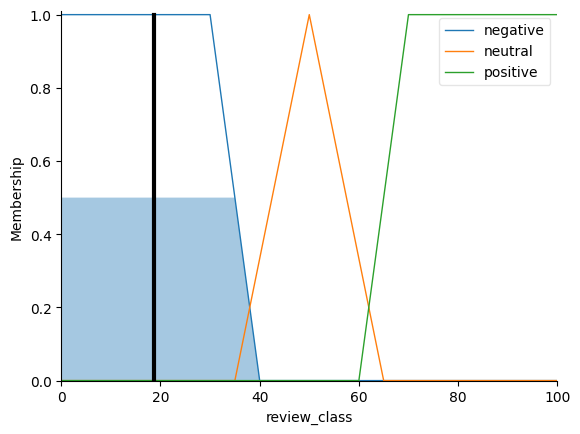

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'emotion_intensity')
pos_words = ctrl.Antecedent(np.arange(0, 11, 1), 'pos_words')
neg_words = ctrl.Antecedent(np.arange(0, 11, 1), 'neg_words')

review_class = ctrl.Consequent(np.arange(0, 101, 1), 'review_class')

sentiment_score['negative'] = fuzz.trapmf(sentiment_score.universe, [0, 0, 0.2, 0.3])
sentiment_score['neutral']  = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trapmf(sentiment_score.universe, [0.7, 0.8, 1, 1])

emotion_intensity['low']    = fuzz.trapmf(emotion_intensity.universe, [0, 0, 0.3, 0.4])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.3, 0.5, 0.7])
emotion_intensity['high']   = fuzz.trapmf(emotion_intensity.universe, [0.6, 0.7, 1, 1])

pos_words['few']  = fuzz.trapmf(pos_words.universe, [0, 0, 2, 3])
pos_words['some'] = fuzz.trimf(pos_words.universe, [2, 4, 6])
pos_words['many'] = fuzz.trapmf(pos_words.universe, [5, 7, 10, 10])

neg_words['few']  = fuzz.trapmf(neg_words.universe, [0, 0, 2, 3])
neg_words['some'] = fuzz.trimf(neg_words.universe, [2, 4, 6])
neg_words['many'] = fuzz.trapmf(neg_words.universe, [5, 7, 10, 10])

review_class['negative'] = fuzz.trapmf(review_class.universe, [0, 0, 30, 40])
review_class['neutral']  = fuzz.trimf(review_class.universe, [35, 50, 65])
review_class['positive'] = fuzz.trapmf(review_class.universe, [60, 70, 100, 100])

rule1 = ctrl.Rule(
    sentiment_score['negative'] & emotion_intensity['high'],
    review_class['negative']
)
rule2 = ctrl.Rule(
    sentiment_score['negative'] & emotion_intensity['low'],
    review_class['neutral']
)
rule3 = ctrl.Rule(
    sentiment_score['neutral'] & emotion_intensity['medium'],
    review_class['neutral']
)
rule4 = ctrl.Rule(
    sentiment_score['positive'] & emotion_intensity['high'],
    review_class['positive']
)

rule5 = ctrl.Rule(
    pos_words['many'] & neg_words['few'],
    review_class['positive']
)
rule6 = ctrl.Rule(
    pos_words['few'] & neg_words['many'],
    review_class['negative']
)
rule7 = ctrl.Rule(
    pos_words['some'] & neg_words['some'],
    review_class['neutral']
)

rule8 = ctrl.Rule(
    sentiment_score['negative'] & neg_words['many'] & emotion_intensity['high'],
    review_class['negative']
)
rule9 = ctrl.Rule(
    sentiment_score['neutral'] & emotion_intensity['medium'] & pos_words['some'],
    review_class['neutral']
)
rule10 = ctrl.Rule(
    sentiment_score['positive'] & pos_words['many'] & emotion_intensity['high'],
    review_class['positive']
)

all_rules = [rule1, rule2, rule3, rule4,
             rule5, rule6, rule7,
             rule8, rule9, rule10]

feedback_ctrl = ctrl.ControlSystem(all_rules)
feedback_sim  = ctrl.ControlSystemSimulation(feedback_ctrl)

feedback_sim.input['sentiment_score'] = 0.25
feedback_sim.input['emotion_intensity'] = 0.8
feedback_sim.input['pos_words'] = 2
feedback_sim.input['neg_words'] = 6

feedback_sim.compute()

print("Review Class (0..100):", feedback_sim.output['review_class'])

review_class.view(sim=feedback_sim)
